1. Case Intro

The dataset was sourced from Kaggle.com, containing product information from the renowned Superstore grocery chain. This case study seeks to conduct a comprehensive analysis with the goal of predicting customer behavior patterns and uncovering valuable insights. The findings from this analysis have the potential to provide valuable insights to various teams within the organization, including the marketing department and researchers, enhancing their understanding of the Superstore's market positioning.

2. Dataset Preprocessing 

In [77]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [78]:
# read the path
df_1 = pd.read_csv(r"D:\Damon_Kaggle_Projects\Project3_Superstore\products_raw_data.csv")
df_2 = pd.read_csv(r"D:\Damon_Kaggle_Projects\Project3_Superstore\products_data.csv")

# merge DataFrames
amount_units_columns = df_2[['Amount', 'Units']]
df = pd.concat([df_1, amount_units_columns], axis=1)

# define output path
output_path = r'D:\Damon_Kaggle_Projects\Project3_Superstore\output'

In [79]:
df

,Name,Current Price,Previous Price,Price Per Each,Category,Product ID,Product URL,Amount,Units
0,English Cucumber,$1.99,$1.99,"1 ea, $1.99/1ea",Fresh Vegetables,20070132001_EA,https://www.realcanadiansuperstore.ca/english-...,1,ea
1,Green Onion,$1.29,$1.29,"1 bunch, $1.29/1ea",Fresh Vegetables,20107500001_EA,https://www.realcanadiansuperstore.ca/green-on...,1,bunch
2,"Bi-Colour Corn, Corn on the Cob",$0.99,$0.99,"1 ea, $0.99/1ea",Fresh Vegetables,20131170001_EA,https://www.realcanadiansuperstore.ca/bi-colou...,1,ea
3,"Romaine Heart, 3 Pack",$6.00,$6.00,"3 pack, $2.00/1ea",Fresh Vegetables,20067389001_EA,https://www.realcanadiansuperstore.ca/romaine-...,3,pack
4,Red Peppers,about $2.38,about $2.38,$9.90/1kg,Fresh Vegetables,20007535001_KG,https://www.realcanadiansuperstore.ca/red-pepp...,1,ea
...,...,...,...,...,...,...,...,...,...
17254,Beef Sausage Rolls,$8.79,$8.79,"630 g, $1.40/100g",Quiches & Pies,/p/21116219_EA,https://www.realcanadiansuperstore.ca/beef-sau...,630,g
17255,Creamy Chicken and Vegetable Pot Pie,$8.00,$8.00,"500 g, $1,600.00/100g",Quiches & Pies,/p/21401776_EA,https://www.realcanadiansuperstore.ca/creamy-c...,500,g
17256,Quiche Florentine,$8.00,$8.00,"500 g, $1.60/100g",Quiches & Pies,/p/21401761_EA,https://www.realcanadiansuperstore.ca/quiche-f...,500,g
17257,Green Tea,$2.29,$2.29,"473 ml, $0.48/100ml",Beverages,/p/20923222_EA,https://www.realcanadiansuperstore.ca/green-te...,473,ml


In [80]:
# exclude unnecessary columns
drop_columns = ['Product ID', 'Product URL']
df.drop(['Product ID', 'Product URL'], axis=1, inplace=True)

In [81]:
# check nulls
df.isna().sum()

Name              0
Current Price     0
Previous Price    0
Price Per Each    0
Category          0
Amount            0
Units             0
dtype: int64

In [82]:
# convert 'Current Price' and 'Previous Price' columns to strings
df['Current Price'] = df['Current Price'].astype(str)
df['Previous Price'] = df['Previous Price'].astype(str)

# exclude non-numerical data in these columns
df['Current Price'] = df['Current Price'].str.replace(r'[^0-9.]', '', regex=True)
df['Previous Price'] = df['Previous Price'].str.replace(r'[^0-9.]', '', regex=True)

df['Current Price'] = df['Current Price'].astype(float)
df['Previous Price'] = df['Previous Price'].astype(float)

In [83]:
# remove outliers
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtype in ['int64','float64']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + 1.5 * iqr
            lower_bound = q1 - 1.5 * iqr
            df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df = remove_outliers(df)

In [84]:
# reorganize duplicated categories to a new list

unique_category = df['Category'].drop_duplicates(inplace = False).tolist()

# show indexes
for index, category in enumerate(unique_category):
    print(f"{index}: {category}")

0: Fresh Vegetables
1: Fresh Fruits
2: Packaged Salad & Dressing
3: Herbs
4: Fresh Cut Fruits & Vegetables
5: Dried Fruits & Nuts
6: Fresh Juice & Smoothies
7: Milk & Cream
8: Egg & Egg Substitutes
9: Butter & Spreads
10: Cheese
11: Yogurt
12: Desserts & Doughs
13: Sour Cream & Dips
14: Lactose Free
15: Non-Dairy Milk Alternatives
16: Canned & Pickled 
17: Baking Essentials
18: Pasta & Pasta Sauce
19: Easy Meals & Sides
20: Cereal & Breakfast
21: Honey, Syrups & Spreads
22: Rice
23: Oils & Vinegar
24: Condiments & Sauces
25: Spices & Seasonings
26: Dried Beans, Vegetables & Grains
27: Bulk Nuts and Candy
28: International Foods
29: Rice & Grain
30: Noodles & Noodle Soup
31: Snacks, Cookies & Crackers
32: Condiments, Sauces & Oil
33: Rice, Lentils, & Beans
34: Bakery
35: Rice, Lentils & Beans
36: Baking & Flour
37: Meat
38: Deli
39: Dairy
40: Frozen Entrees
41: Canned, Pickled Food & Olives
42: Frozen
43: Rice, Noodles & Noodle Soup
44: Canned Food
45: Condiments & Salsa
46: Fruits & Ve

In [85]:
new_category_list = []

# rename the categories
for x in df['Category'].tolist():
    # Check which category group it belongs to based on its position in unique_category list
    if x in unique_category[:7]:
        new_category_list.append('Fruits & Vegetables')
    elif x in unique_category[7:16]:
        new_category_list.append('Dairy & Eggs')
    elif x in unique_category[16:29]:
        new_category_list.append('Pantry')
    elif x in unique_category[29:50]:
        new_category_list.append('International Foods')
    elif x in unique_category[50:57]:
        new_category_list.append('Meat')
    elif x in unique_category[57:64]:
        new_category_list.append('Fish & Seafood')
    elif x in unique_category[64:68]:
        new_category_list.append('Snacks, Chips & Candy')
    elif x in unique_category[68:77]:
        new_category_list.append('Drinks')
    elif x in unique_category[77:86]:
        new_category_list.append('Frozen')
    elif x in unique_category[86:95]:
        new_category_list.append('Natural and Organic Foods')
    elif x in unique_category[95:102]:
        new_category_list.append('Deli')
    elif x in unique_category[102:108]:
        new_category_list.append('Bakery')
    elif x in unique_category[108:]:
        new_category_list.append('Prepared Meals')

df['Product Category'] = new_category_list

# drop the orginial category column

df.drop(columns= 'Category', inplace = True)

df.head()

,Name,Current Price,Previous Price,Price Per Each,Amount,Units,Product Category
0,English Cucumber,1.99,1.99,"1 ea, $1.99/1ea",1,ea,Fruits & Vegetables
1,Green Onion,1.29,1.29,"1 bunch, $1.29/1ea",1,bunch,Fruits & Vegetables
2,"Bi-Colour Corn, Corn on the Cob",0.99,0.99,"1 ea, $0.99/1ea",1,ea,Fruits & Vegetables
3,"Romaine Heart, 3 Pack",6.00,6.00,"3 pack, $2.00/1ea",3,pack,Fruits & Vegetables
4,Red Peppers,2.38,2.38,$9.90/1kg,1,ea,Fruits & Vegetables


In [86]:
# save the cleaned data into the output 
cleaned_df = df.copy()
cleaned_df.to_csv(output_path+r'cleaned_df.csv')

3. Analysis

3.1 Avg Current Price vs. Avg Previous Price

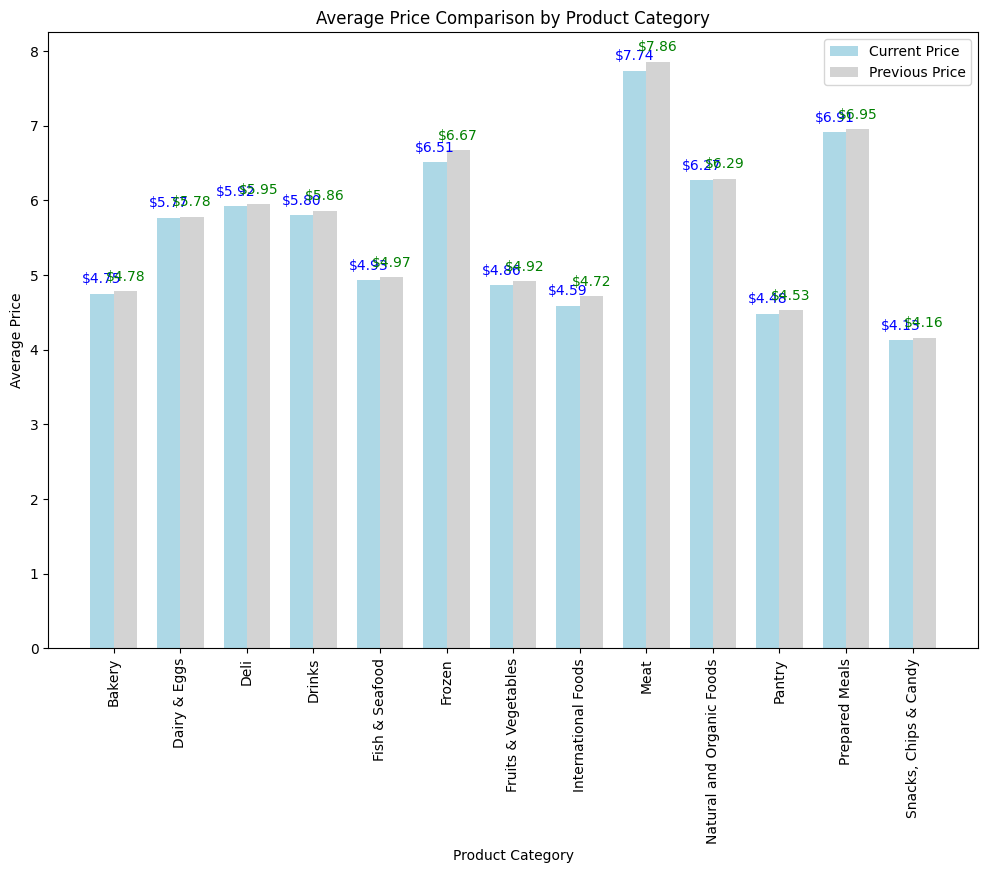

In [103]:
# calculate current avg price and previous avg price
average_current_prices = cleaned_df.groupby('Product Category')['Current Price'].mean().round(2)
average_previous_prices = cleaned_df.groupby('Product Category')['Previous Price'].mean().round(2)

# set the width of each bar
bar_width = 0.35

# define the x-axis positions for the bars
x = range(len(average_current_prices))

# create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# draw bar plot for current prices
ax.bar(x, average_current_prices, width=bar_width, label='Current Price', color='lightblue')

# draw bar plot for previous prices
ax.bar([i + bar_width for i in x], average_previous_prices, width=bar_width, label='Previous Price', color='lightgray')

# set x-axis labels
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(average_current_prices.index, rotation=90)

plt.title('Average Price Comparison by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')

# add annotations with average price values on each bar
for i, v in enumerate(average_current_prices):
    ax.text(i, v + 0.1, f'${v:.2f}', color='b', ha='center', va='bottom', fontsize=10)

for i, v in enumerate(average_previous_prices):
    ax.text(i + bar_width, v + 0.1, f'${v:.2f}', color='g', ha='center', va='bottom', fontsize=10)

# add a legend
ax.legend()

plt.show()

There is a consistent pattern of only slight decreases in the average price within each category. Most food categories have prices ranging from $4 to $6. However, certain categories such as Frozen, Meat, and Prepared Meals have prices exceeding $6. Among them, Meat stands out with the highest average price at $7.74.

3.2 Product Category Frequencies

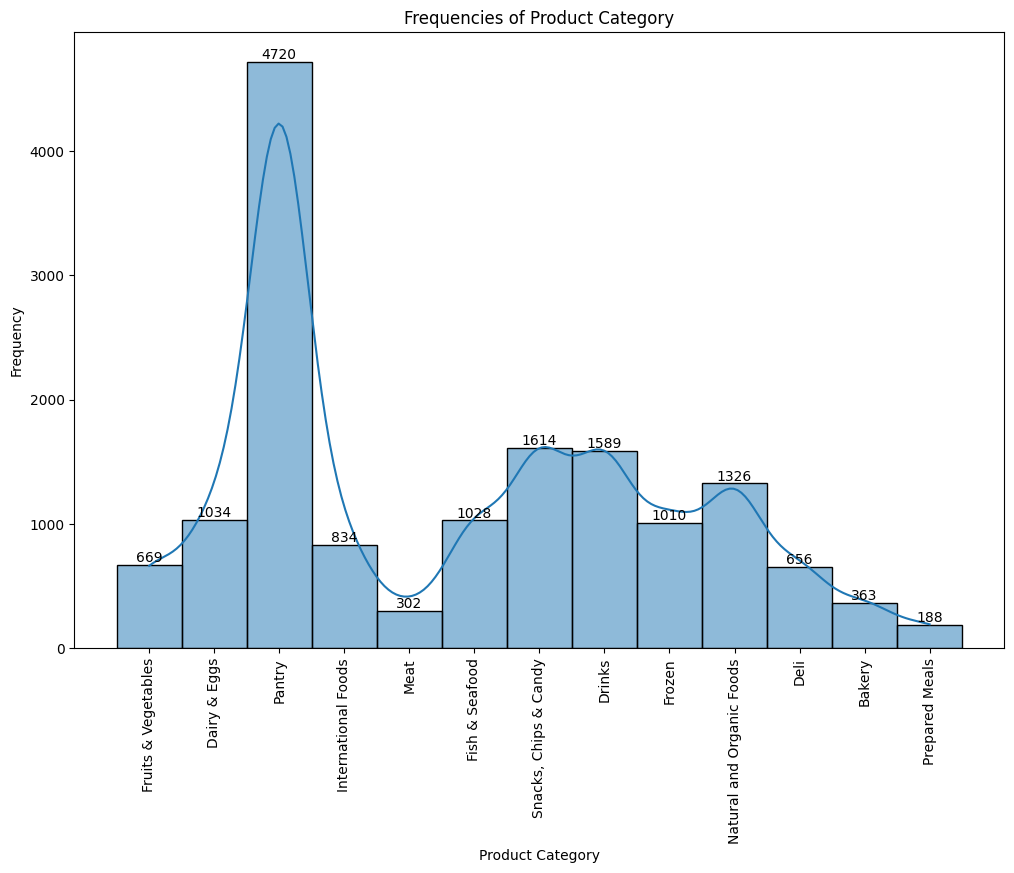

In [118]:
# establish visualization
plt.figure(figsize=(12, 8))
ax = sns.histplot(data=cleaned_df, x='Product Category', bins=10, kde=True)
plt.xticks(rotation=90)
plt.title('Frequencies of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Frequency')

# Add value labels to each bar
for i, v in enumerate(ax.patches):
    ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.1, str(int(v.get_height())),
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Pantry is particularly notable with the highest frequency, totaling 4720 occurrences, which is nearly 25 times greater than that of Prepared Meals. In conclusion, the availability of more detailed data could facilitate a more in-depth examination.  